In [1]:
import dpdata
import numpy as np
from deepmd.infer import DeepPot
import matplotlib.pyplot as plt 

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
dp_short = DeepPot('../1-Short_training/frozen_model.pb')

2022-09-10 22:34:24.728343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-10 22:34:24.730307: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-09-10 22:34:24.737651: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Error histogram

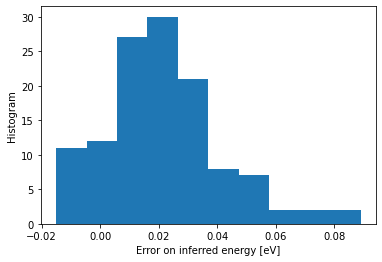

In [3]:
system = dpdata.LabeledSystem('../1-Short_training/TrainingData/liquid-water-1', fmt = 'deepmd/raw')
e, f, v = dp_short.eval(system['coords'], system['cells'], system['atom_types'])
energy_model = e.reshape([-1]) 
energy_dft=np.genfromtxt("../1-Short_training/TrainingData/liquid-water-1/energy.raw")
number_of_molecules=64
plt.hist((energy_model-energy_dft)/number_of_molecules)
plt.xlabel("Error on inferred energy [eV]")
plt.ylabel("Histogram")
plt.show()